In [2]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

In [63]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [64]:
import torch
X = torch.arange(-3,3,0.1).view(-1,1)
f = -3 * X

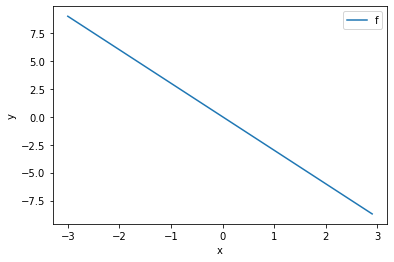

In [65]:
plt.plot(X.numpy(),f.numpy(),label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [66]:
Y = f + 0.1 * torch.randn(X.size())

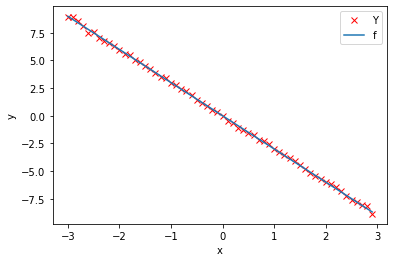

In [67]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='Y')

plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Create the Model and Cost Function (Total Loss)

In [68]:
def forward(x):
    return w * x

In [69]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [70]:
lr = 0.1
Loss = []

In [71]:
w = torch.tensor(-10.0,requires_grad=True)
gradient_plot = plot_diagram(X, Y, w, stop = 5)

# Train the Model

In [74]:
def train_model(iter):
    for epoch in range (iter):
    
        Yhat = forward(X)
    
        loss = criterion(Yhat, Y)
    
        gradient_plot(Yhat,w,loss.item(),epoch)
    
        Loss.append(loss.item())
    
        loss.backward()
    
        w.data = w.data - lr*w.grad.data
    
        w.grad.data.zero_()

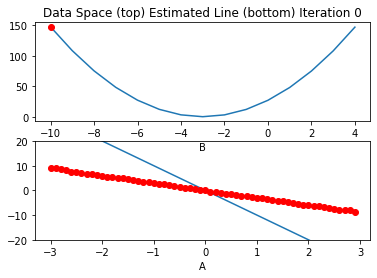

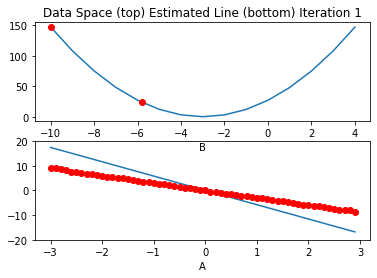

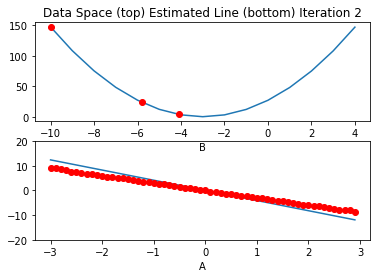

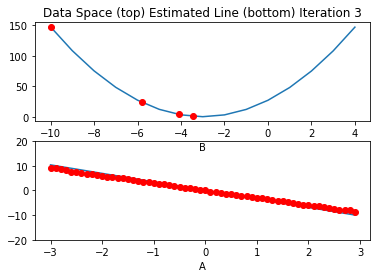

<Figure size 432x288 with 0 Axes>

In [75]:
train_model(4)

Text(23.875, 0.5, 'Cost')

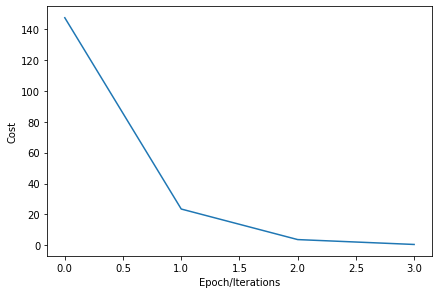

In [76]:
plt.plot(Loss)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [79]:
def forward(x):
    return w * x

def criterion(yhat,y):
    return torch.mean((yhat - y)**2)

lr = 0.1
Loss = []

w = torch.tensor(-15.0, requires_grad = True)
gradient_plot = plot_diagram(X, Y, w, stop = 5)



In [82]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        Loss.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

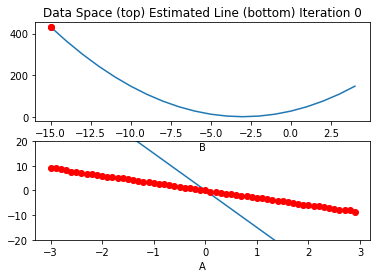

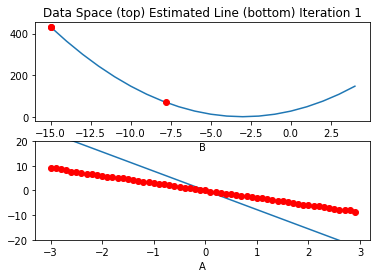

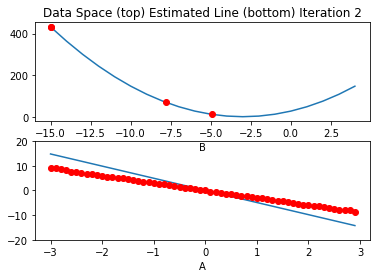

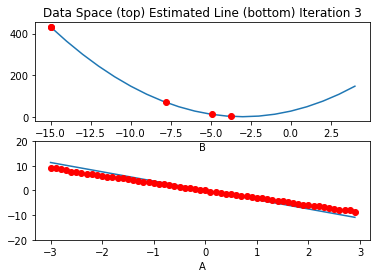

<Figure size 432x288 with 0 Axes>

In [83]:
# Give 4 iterations for training the model here.

train_model(4)

Text(23.875, 0.5, 'Cost')

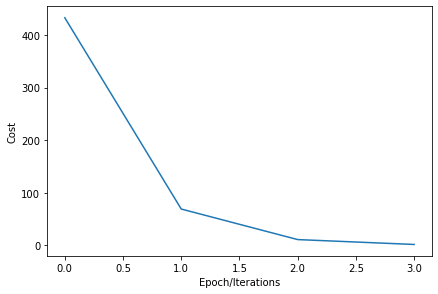

In [84]:
# Plot the loss for each iteration

plt.plot(Loss)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")